In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

from skimage import measure
from skimage.draw import ellipsoid
import cactas as C
import nrrd

2024-07-23 06:10:36.903932: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/CA/'

In [3]:
seg = C.Helper.load_seg_data(DATAPATH)

In [4]:
seg

['13.ca.seg.nrrd',
 '55.ca.seg.nrrd',
 '18.ca.seg.nrrd',
 '47.ca.seg.nrrd',
 '60.ca.seg.nrrd',
 '35.ca.seg.nrrd',
 '16.ca.seg.nrrd',
 '33.ca.seg.nrrd',
 '95.ca.seg.nrrd',
 '61.ca.seg.nrrd',
 '50.ca.seg.nrrd',
 '7.ca.seg.nrrd',
 '6.ca.seg.nrrd',
 '39.ca.seg.nrrd',
 '9.ca.seg.nrrd',
 '2.ca.seg.nrrd',
 '66.ca.seg.nrrd',
 '17.ca.seg.nrrd',
 '71.ca.seg.nrrd',
 '48.ca.seg.nrrd',
 '86.ca.seg.nrrd',
 '24.ca.seg.nrrd',
 '77.ca.seg.nrrd',
 '96.ca.seg.nrrd',
 '49.ca.seg.nrrd',
 '93.ca.seg.nrrd',
 '91.ca.seg.nrrd',
 '94.ca.seg.nrrd',
 '12.ca.seg.nrrd',
 '5.ca.seg.nrrd',
 '14.ca.seg.nrrd',
 '52.ca.seg.nrrd',
 '11.ca.seg.nrrd',
 '46.ca.seg.nrrd',
 '42.ca.seg.nrrd',
 '87.ca.seg.nrrd',
 '40.ca.seg.nrrd',
 '73.ca.seg.nrrd',
 '53.ca.seg.nrrd',
 '22.ca.seg.nrrd',
 '62.ca.seg.nrrd',
 '65.ca.seg.nrrd',
 '25.ca.seg.nrrd',
 '45.ca.seg.nrrd',
 '64.ca.seg.nrrd',
 '63.ca.seg.nrrd',
 '84.ca.seg.nrrd',
 '21.ca.seg.nrrd',
 '57.ca.seg.nrrd',
 '92.ca.seg.nrrd',
 '75.ca.seg.nrrd',
 '83.ca.seg.nrrd',
 '41.ca.seg.nrrd'

In [5]:
len(seg)

70

13.ca.seg.nrrd


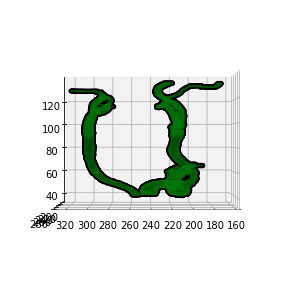

55.ca.seg.nrrd


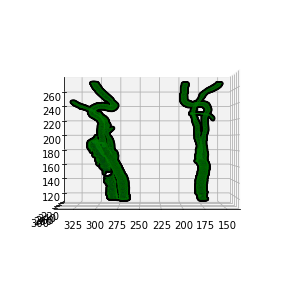

18.ca.seg.nrrd


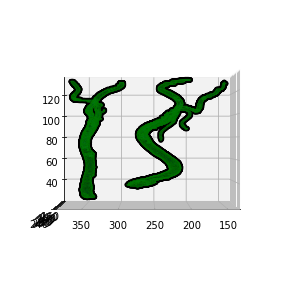

47.ca.seg.nrrd


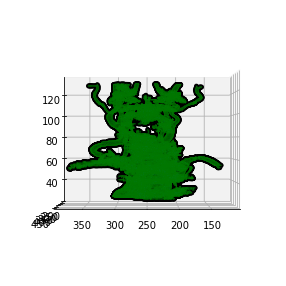

60.ca.seg.nrrd


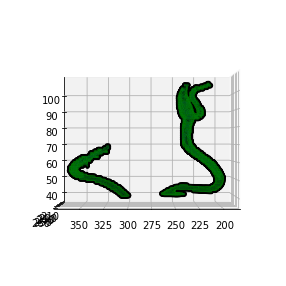

35.ca.seg.nrrd


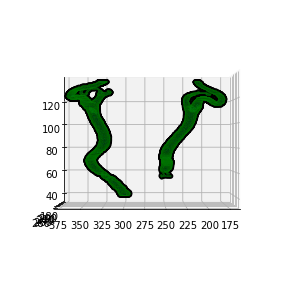

16.ca.seg.nrrd


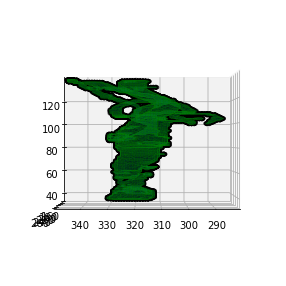

33.ca.seg.nrrd


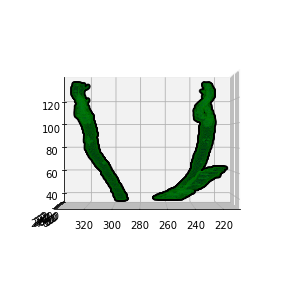

95.ca.seg.nrrd


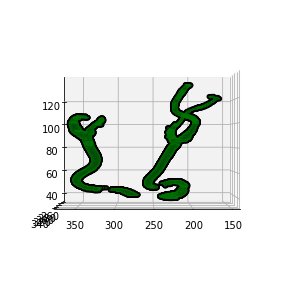

61.ca.seg.nrrd


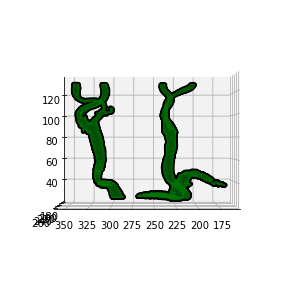

50.ca.seg.nrrd


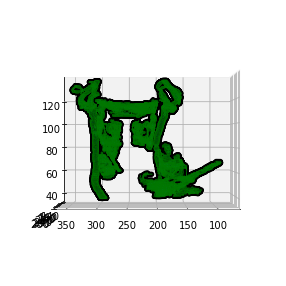

7.ca.seg.nrrd


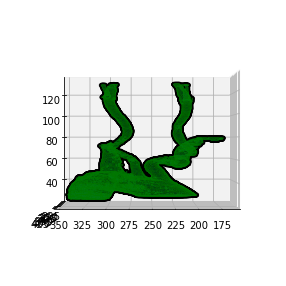

6.ca.seg.nrrd


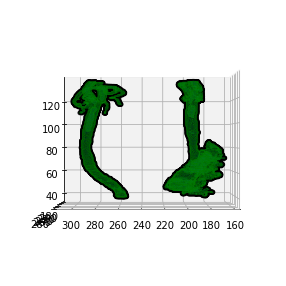

39.ca.seg.nrrd


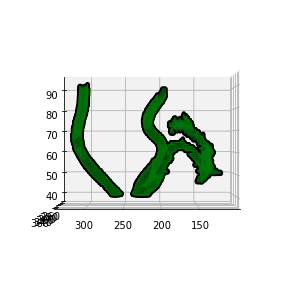

9.ca.seg.nrrd


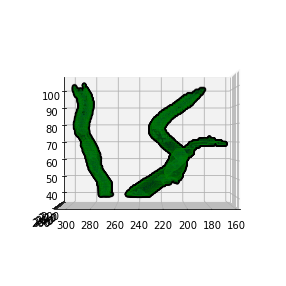

2.ca.seg.nrrd


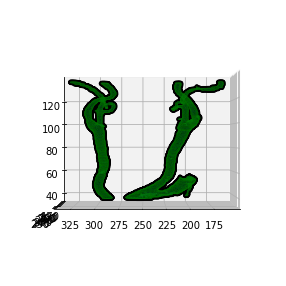

66.ca.seg.nrrd


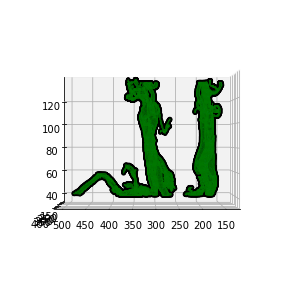

71.ca.seg.nrrd


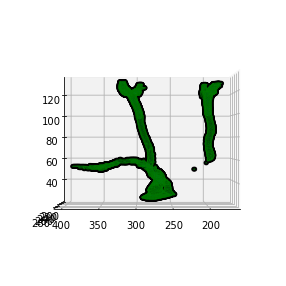

48.ca.seg.nrrd


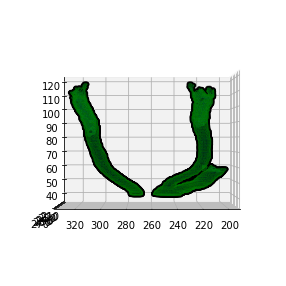

86.ca.seg.nrrd


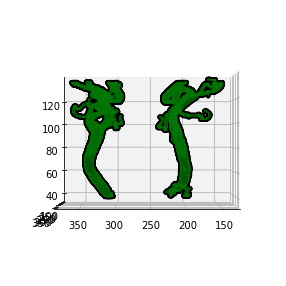

24.ca.seg.nrrd


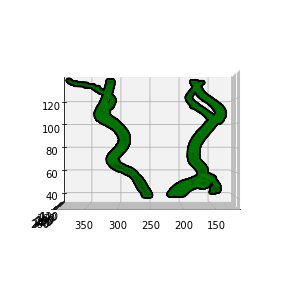

77.ca.seg.nrrd


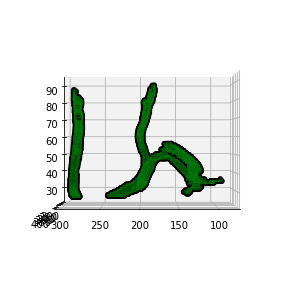

96.ca.seg.nrrd


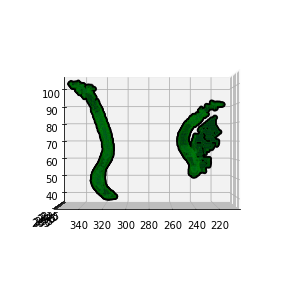

49.ca.seg.nrrd


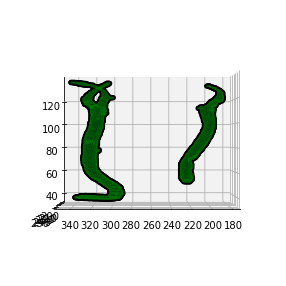

93.ca.seg.nrrd


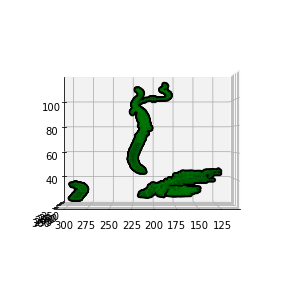

91.ca.seg.nrrd


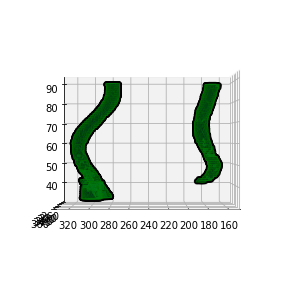

94.ca.seg.nrrd


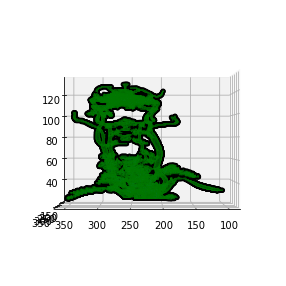

12.ca.seg.nrrd


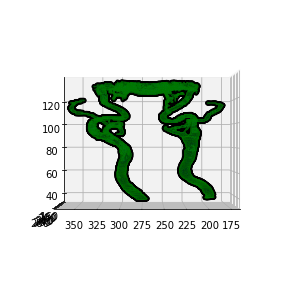

5.ca.seg.nrrd


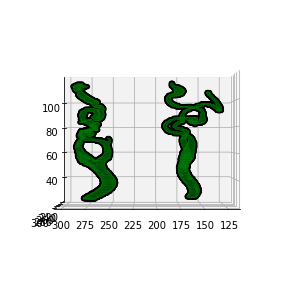

14.ca.seg.nrrd


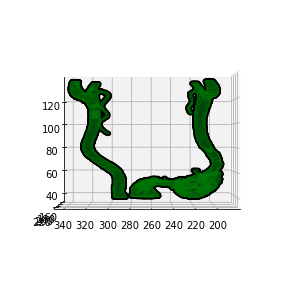

52.ca.seg.nrrd


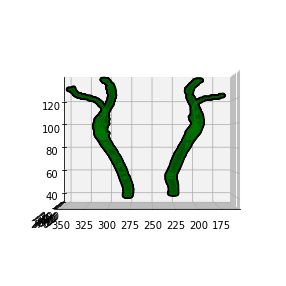

11.ca.seg.nrrd


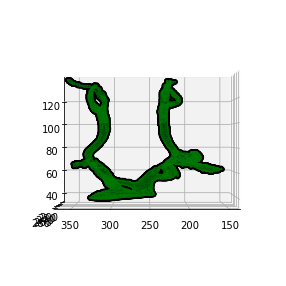

46.ca.seg.nrrd


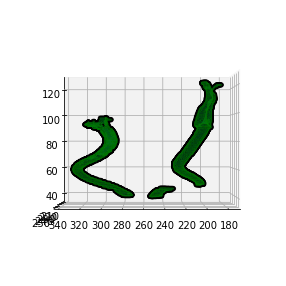

42.ca.seg.nrrd


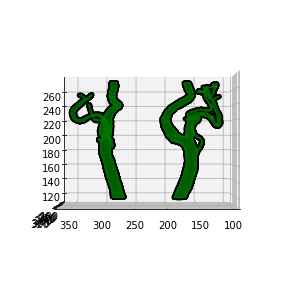

87.ca.seg.nrrd


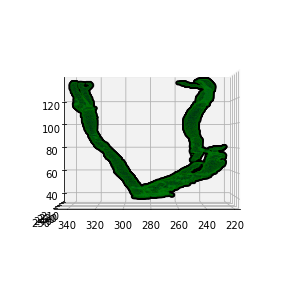

40.ca.seg.nrrd


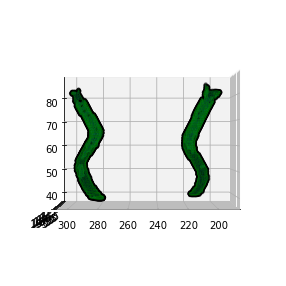

73.ca.seg.nrrd


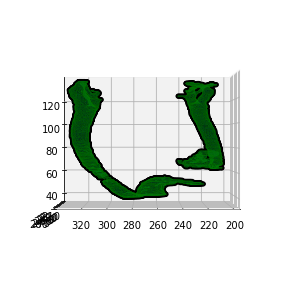

53.ca.seg.nrrd


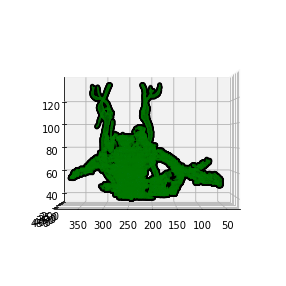

22.ca.seg.nrrd


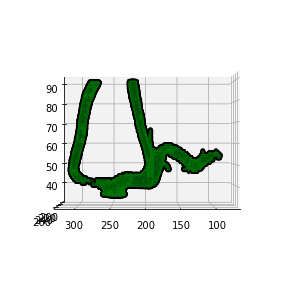

62.ca.seg.nrrd


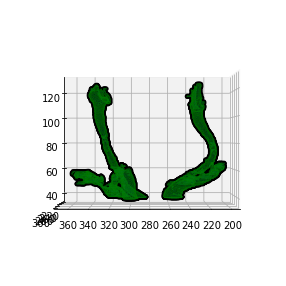

25.ca.seg.nrrd


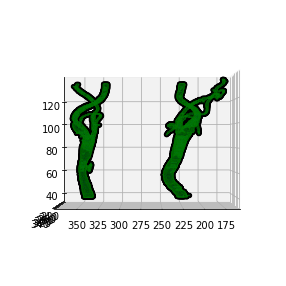

45.ca.seg.nrrd


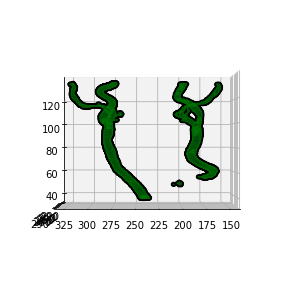

64.ca.seg.nrrd


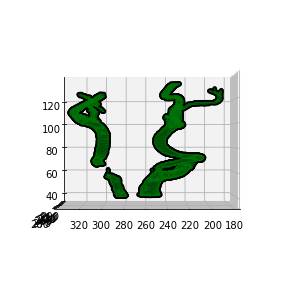

63.ca.seg.nrrd


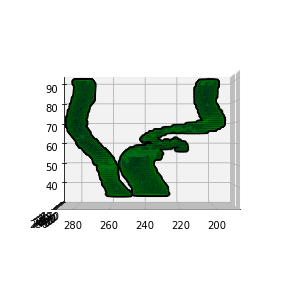

84.ca.seg.nrrd


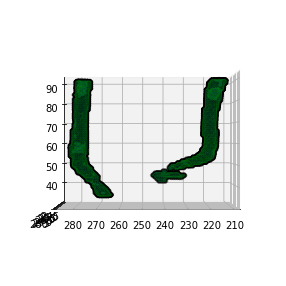

21.ca.seg.nrrd


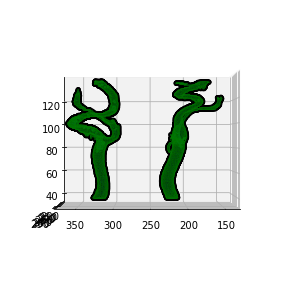

57.ca.seg.nrrd


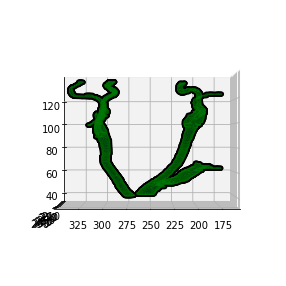

92.ca.seg.nrrd


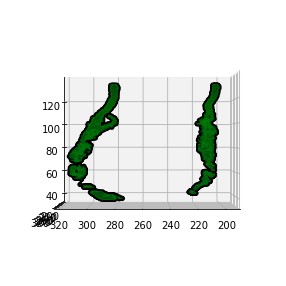

75.ca.seg.nrrd


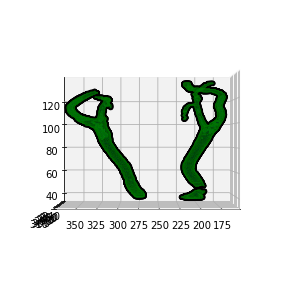

83.ca.seg.nrrd


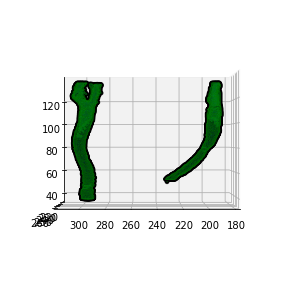

41.ca.seg.nrrd


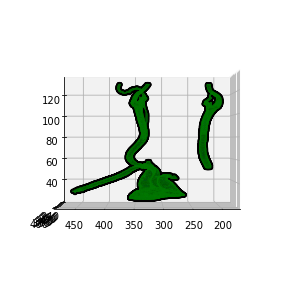

90.ca.seg.nrrd


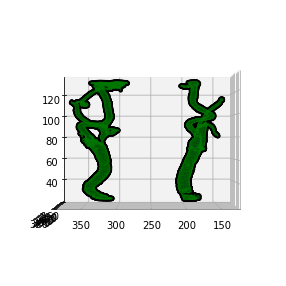

69.ca.seg.nrrd


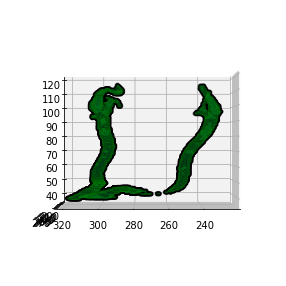

26.ca.seg.nrrd


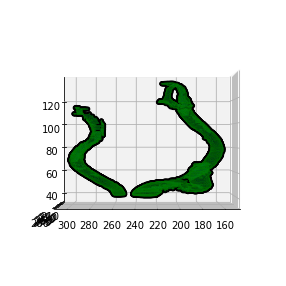

79.ca.seg.nrrd


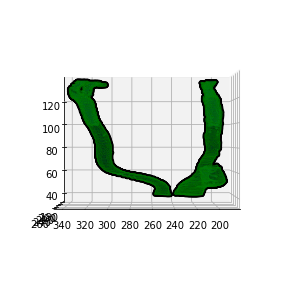

82.ca.seg.nrrd


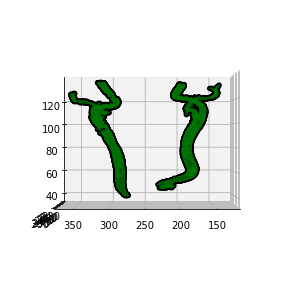

36.ca.seg.nrrd


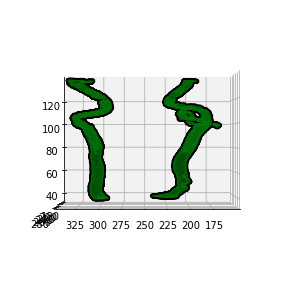

97.ca.seg.nrrd


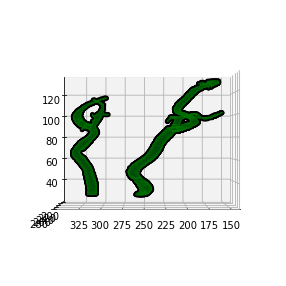

88.ca.seg.nrrd


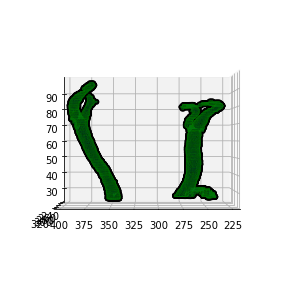

29.ca.seg.nrrd


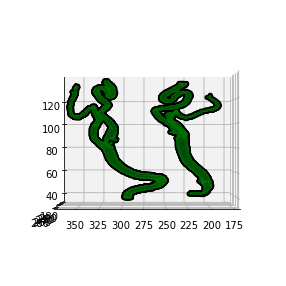

23.ca.seg.nrrd


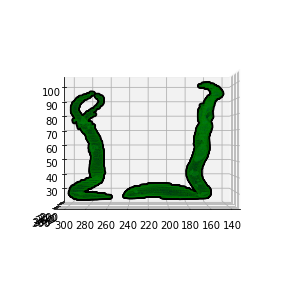

10.ca.seg.nrrd


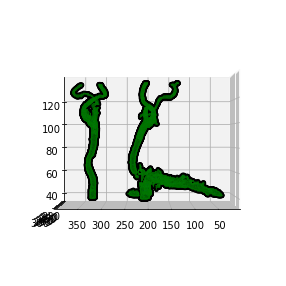

31.ca.seg.nrrd


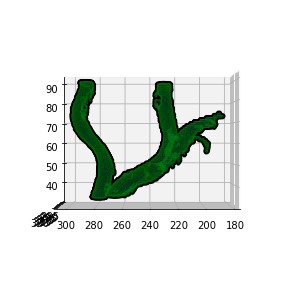

27.ca.seg.nrrd


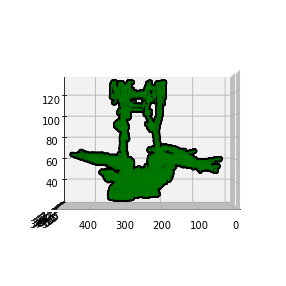

32.ca.seg.nrrd


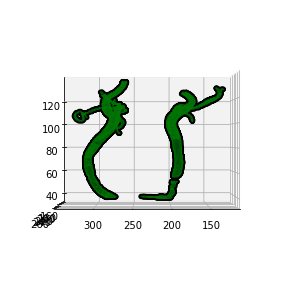

15.ca.seg.nrrd


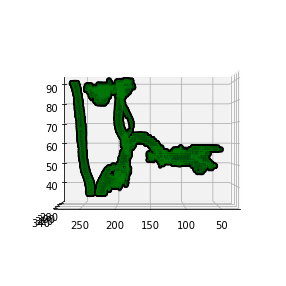

51.ca.seg.nrrd


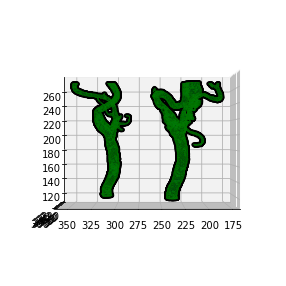

72.ca.seg.nrrd


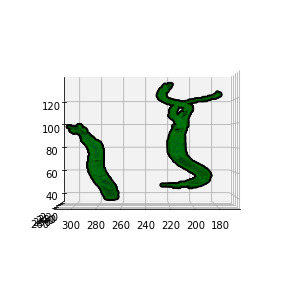

In [6]:
for i in range(len(seg)):
    d = DATAPATH + seg[i]
    data, header = nrrd.read(d)
    
    min_val, max_val = data.min(), data.max()
    isovalue = (min_val + max_val) / 2 
    
    if isovalue != 0:
        vertices, faces, normals, values = measure.marching_cubes(data, isovalue)
        print(seg[i])
        
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', s=10)

        mesh = Poly3DCollection(vertices[faces], linewidths=0.05, edgecolors='green', alpha=0.1)
        ax.add_collection3d(mesh)
        
        ax.view_init(elev=0, azim=90)

        plt.show()